#  Spam Email Classifier (Using Kaggle Dataset)
This notebook demonstrates a high-accuracy spam classifier using the SMS Spam Collection Dataset from Kaggle, with text preprocessing and machine learning via Naive Bayes and TF-IDF.

#  Install Required Libraries
Installs all necessary Python libraries such as:
- `pandas`, `numpy` for data manipulation
- `scikit-learn` for building the machine learning pipeline
- `matplotlib`, `seaborn` for visualization
- `nltk` for natural language processing tasks

In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn nltk

#  Import Libraries
Imports essential libraries for data processing, visualization, model training, and natural language preprocessing. Also downloads NLTK stopwords used during text preprocessing.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#  Load and Prepare Dataset
Loads the dataset `spam.csv`, selects relevant columns, renames them, and encodes labels (`ham` = 0, `spam` = 1). This prepares the dataset for binary classification.

In [ ]:
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#  Visualize Class Distribution
Plots the distribution of 'ham' vs 'spam' messages to understand data balance. This helps detect any class imbalance which could impact model training.

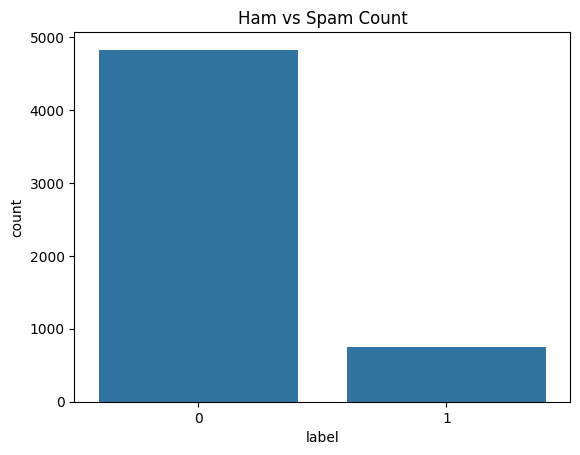

In [ ]:
sns.countplot(x='label', data=df)
plt.title("Ham vs Spam Count")
plt.show()

#  Text Preprocessing
Defines a preprocessing function that:
- Converts text to lowercase
- Removes digits and punctuation
- Removes stopwords
- Applies stemming using `PorterStemmer`

Applies this function to all messages and stores the cleaned version in a new column.

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.strip()
    tokens = text.split()
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(preprocess_text)
df[['text', 'clean_text']].head()

,text,clean_text
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


#  Train/Test Split
Splits the cleaned dataset into training and testing sets (80% train / 20% test). This ensures the model is trained and evaluated on different data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['label'], test_size=0.2, random_state=42)

#  Create and Train Pipeline
Creates a machine learning pipeline with:
- `TfidfVectorizer` for transforming text into numerical vectors
- `MultinomialNB` classifier with smoothing (`alpha=0.3`)

Trains the model using the training data.

In [ ]:
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_df=0.95, min_df=2, ngram_range=(1,2))),
    ('clf', MultinomialNB(alpha=0.3))
])

model.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.95, min_df=2, ngram_range=(1, 2))),
                ('clf', MultinomialNB(alpha=0.3))])

#  Evaluate Model
Evaluates the model's performance on test data using:
- Accuracy score
- Precision, recall, F1-score from `classification_report`
Provides insight into how well the model distinguishes between ham and spam.

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9766816143497757

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



#  Confusion Matrix
Displays a heatmap of the confusion matrix to visually evaluate model predictions:
- True Positives
- False Positives
- True Negatives
- False Negatives

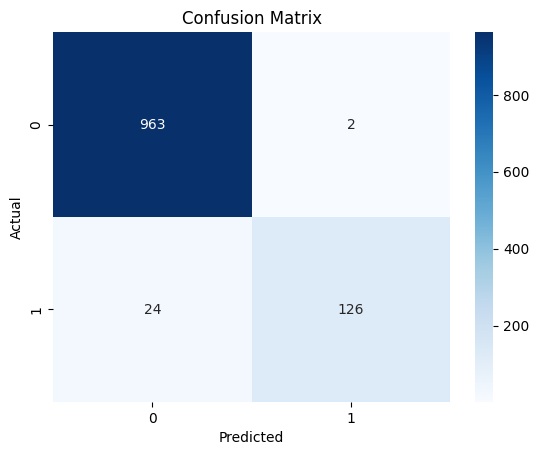

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

---

###  Contact Me

Feel free to reach out or follow me on social media:

- 📸 Instagram: [@su_codz](https://www.instagram.com/su_codz/)
- 🌐 porfolio: [Soulef Bentorki](https://soulefbentorki.netlify.app)
- 💼 Shop: [education shop](https://ko-fi.com/soulefbentorki)
- 💻 Github: [sucodz](https://github.com/sucodz)


_Thank you for checking out this notebook!_
---